<div style="padding: 40px;border:2px ridge black;margin: 48px 0px 48px 0px;">
 <p style="font-size: 3vw;text-align: center;padding: 20px;font-weight: bold;">Plant Stress via FAO-56</p>
  <img src="https://drive.google.com/uc?id=1TLUYQ7uSpISZI2V3CVF15XrhhiJPENj1" style="width:80vw;height:auto;padding: 40px;"align="center">
 <p style="font-size: 2vw;text-align: center;padding: 20px;font-weight: bold;">Will Dodge | Spring 2018</p>
</div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

<div style="padding: 10px;border:2px ridge black;margin: 24px 0px 24px 0px;">
    <p style="font-size: 2.125vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Import required libraries</p>
</div>

In [2]:
import numpy.polynomial.polynomial as poly
import ipywidgets as ipyw
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import pandas as pd
import math
import numpy as np
import qgrid

<div style="padding: 10px;border:2px ridge black;margin: 24px 0px 24px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Observation data required for FAO-56</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The required parameters for calculating ET<sub>o</sub> are solar radiation, wind speed, air temperature, and relative humididity. The specifics of these observations is well documented in the publication this model is based upon. In the event that one is missing data or entire parameters the official documentation at the <a href="http://www.fao.org/docrep/X0490E/x0490e00.htm#Contents">FAO website</a> sould be consulted to determine the approach to calculating ETO without said missing variable.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1scDh_GzljhJ6AyVDlQz-k_ZadNvyW6Sc" 
         style="width:70vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Read weather data into data frame</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    In this script the raw <code>.csv</code> data is coming from a google drive shareable link. This is <b>great</b> because the notebook itself can be distributed without needing to also distrubute a slew of assocaited file data. The other thing is that users who execute this code will not have to adjust the filepath given to the <code>pd.read_csv()</code> command.

</p>   
</div>

In [3]:
DF = pd.read_csv("https://drive.google.com/uc?id=1YiLueOw-vbVKIf2kvb9RRKY_hpsCj1zD")

In [4]:
DF[:5]

,date,year,day,radn.W/m2,maxt.C,mint.C,soiltemp.4in.C,soiltemp.8in.C,rain.mm,wind.2m.m/s,wind.10m.m/s,min.RH.%,max.RH.%,avg.RH.%
0,2017-01-01,2017,1,145.56,18.39,0.40,7.73,8.36,9.3,3.06,3.74,28.02,91.40,54.64
1,2017-01-02,2017,2,138.91,15.85,4.22,7.93,8.67,0.1,4.46,5.30,29.81,97.20,62.46
2,2017-01-03,2017,3,135.62,9.67,-1.76,7.22,8.20,0.0,4.02,4.82,43.10,86.60,63.75
3,2017-01-04,2017,4,138.39,9.42,-2.99,5.58,6.73,0.0,3.80,4.69,41.58,65.67,50.34
4,2017-01-05,2017,5,143.44,7.72,-10.09,4.39,5.85,0.0,5.26,6.24,41.41,77.93,59.39


<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Handle date column</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    With time-series data the variable (column) of your dataset that contains the date and time information needs to be formatted as a datetime object. We can then set this column as the index for the dataframe so that the data is always handled in chronological order. This will expedite and simplify many of our later visualizations and data queries.   

</p>   
</div>

In [5]:
DF["date"] = pd.to_datetime(DF["date"])

In [6]:
DF = DF.set_index(DF["date"])

In [7]:
DF[:5] # note the date is now the index

,date,year,day,radn.W/m2,maxt.C,mint.C,soiltemp.4in.C,soiltemp.8in.C,rain.mm,wind.2m.m/s,wind.10m.m/s,min.RH.%,max.RH.%,avg.RH.%
date,,,,,,,,,,,,,,
2017-01-01,2017-01-01,2017,1,145.56,18.39,0.40,7.73,8.36,9.3,3.06,3.74,28.02,91.40,54.64
2017-01-02,2017-01-02,2017,2,138.91,15.85,4.22,7.93,8.67,0.1,4.46,5.30,29.81,97.20,62.46
2017-01-03,2017-01-03,2017,3,135.62,9.67,-1.76,7.22,8.20,0.0,4.02,4.82,43.10,86.60,63.75
2017-01-04,2017-01-04,2017,4,138.39,9.42,-2.99,5.58,6.73,0.0,3.80,4.69,41.58,65.67,50.34
2017-01-05,2017-01-05,2017,5,143.44,7.72,-10.09,4.39,5.85,0.0,5.26,6.24,41.41,77.93,59.39


<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Calculate daily mean temperature, ℃</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    We need the daily temperature average. We caclulate this from the daily min and max temperature values from the raw data. I have included a line at the end of each step to show the output of our calculations. This is important so that we can monitor the output as we go and hopefully identify the source of any possible errors.  

</p>   
</div>

In [8]:
DF["avgt.C"] = (DF["mint.C"] + DF["maxt.C"]) / 2

In [9]:
DF["avgt.C"][:5]

date
2017-01-01     9.395
2017-01-02    10.035
2017-01-03     3.955
2017-01-04     3.215
2017-01-05    -1.185
Name: avgt.C, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Calculate mean daily solar radiation (R<sub>s</sub>), MJ m<sup>-2</sup> day<sup>-1</sup></p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    This variable is calculated in our raw weather data but in different units than we require. So we need a conversion because the values for solar radiation are in W/m<sup>2</sup>.   

</p>   
</div>

In [10]:
DF["radn.W/m2"][:5] # W m^-2

date
2017-01-01    145.56
2017-01-02    138.91
2017-01-03    135.62
2017-01-04    138.39
2017-01-05    143.44
Name: radn.W/m2, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1vw;text-align: left;padding: 20px 10px 5px 10px;font-weight: bold;">
        Convert daily solar from watts to megajoules, MJ m<sup>-2</sup> day<sup>-1</sup></p>
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">

    Here we make a conversion from W/m<sup>2</sup> to MJ m<sup>-2</sup> day<sup>-1</sup> by multiplying our observed solar by 0.0864.
</p>   
</div>

In [11]:
DF["radn.MJ/m2"] = DF["radn.W/m2"] * 0.0864

In [12]:
DF["radn.MJ/m2"][:5]

date
2017-01-01    12.576384
2017-01-02    12.001824
2017-01-03    11.717568
2017-01-04    11.956896
2017-01-05    12.393216
Name: radn.MJ/m2, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        The average daily wind speed (<i><b>u</b></i><sub>2</sub>), m s<sup>-1</sub></p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Measured two meters above a realatively flat surface. This in an observed value in our raw data already in correct units, <b>meters per second</b>. 
</p>   
</div>

In [13]:
DF["wind.2m.m/s"][:5]

date
2017-01-01    3.06
2017-01-02    4.46
2017-01-03    4.02
2017-01-04    3.80
2017-01-05    5.26
Name: wind.2m.m/s, dtype: float64

In [14]:
max(DF["wind.2m.m/s"]) # maximum mean daily wind for ten meters

7.69

In [15]:
max(DF["wind.10m.m/s"]) # maximum mean daily wind for ten meters

10.32

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1vw;text-align: left;font-weight: 550;padding: 
              20px 10px 0px 10px;line-height: 1.5;"><b>Convert max wind averge to <i>miles per hour</i> to check data</b></p>
    
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">

    Our value is in meters per second but we can convert this to miles per hour. Divide the by <b>1609.34 meters to convert meters to miles</b> and then <b>multiply by 3600 seconds</b> to convert seconds to hours.

    </p>   
</div>

In [16]:
max_wind_avg_2m = (max(DF["wind.2m.m/s"]) / 1609.34) * 3600

In [17]:
max_wind_avg_2m # miles per hour

17.20208284141325

In [18]:
max_wind_avg_10m = (max(DF["wind.10m.m/s"]) / 1609.34) * 3600 

In [19]:
max_wind_avg_10m # miles per hour 

23.085239912013623

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Slope of the saturation vapor pressure curve (Delta), kPa</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1uA6Zo-K6dcbzuBiNDWyU_K61Tvd6pmH7" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [20]:
DF["delta"] = 4098 * (0.6106 * np.exp((17.27 * DF["avgt.C"])/(DF["avgt.C"] + 237.3))) / ((DF["avgt.C"] + 237.3)**2)

In [21]:
DF["delta"][:5]

date
2017-01-01    0.079368
2017-01-02    0.082426
2017-01-03    0.057060
2017-01-04    0.054488
2017-01-05    0.041157
Name: delta, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Atmospheric Pressure (P), kPa </p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    This is the pressure exerted by the weight of the earth's atmosphere. Altitude is factor when calculating this varaible. This model uses the equation in the following figure. We will make the calculation once in this model and use that as a contstant atmospheric pressure for this altitude. In the following equation <b>Z is altitude in meters</b>. 
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1pIpkTvzi88OcoCTiPHRPq7_Xu5lEX6dm" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [22]:
elevation = 992 # high plians of texas

In [23]:
P = 101.3 * (((293 - (0.0065 * elevation)) / 293) ** 5.26)

In [24]:
P # in kPa

90.11059920767981

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Psychrometric constant (gamma), kPa ℃<sup>-1</sup></p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    This variable is the relationsip between the partial pressure of water vapor in the air and temperature. It uses our calculated atmospheric pressure (P) value to estimate the psychrometric constant. This value will be used to calculate saturated vapor pressure.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1tBdICICKsNEwZg5GaYGTioVlA3a2aM2v" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [25]:
gamma = 0.000665 * P

In [26]:
gamma

0.059923548473107074

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Delta Term (DT), auxiliary calculation for the radiation term</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    To simplify the overall ET<sub>o</sub> we can calculate portions of the equation seperately. The Delta Term will be used to calculate our radiation driven ET<sub>o</sub> terms in later steps.  
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1vxH1NEzFgqZx81b4AJOwbz8ym0OtOFF6" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [27]:
DF["delta.term"] = DF["delta"] / (DF["delta"] + (gamma * (1 + 0.34 * DF["wind.2m.m/s"])))

In [28]:
DF["delta.term"][:5]

date
2017-01-01    0.393619
2017-01-02    0.353428
2017-01-03    0.286896
2017-01-04    0.284039
2017-01-05    0.197633
Name: delta.term, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Psi Term (PT), auxiliary calculation for the wind term</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Again, we make an auxiliary calculation to simplify the overall ET<sub>o</sub> process. The Psi Term will be used to calculate our wind driven ET<sub>o</sub> terms in later steps.  
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1yVSXpAr2bQOrUbF9vPwkcsRP3RI_jNav" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [29]:
DF["psi.term"] = gamma / (DF["delta"] + (gamma * (1 + 0.34 * DF["wind.2m.m/s"])))

In [30]:
DF["psi.term"][:5]

date
2017-01-01    0.297187
2017-01-02    0.256943
2017-01-03    0.301294
2017-01-04    0.312374
2017-01-05    0.287752
Name: psi.term, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Temperature Term (TT), auxiliary calculation for the wind term</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Again, we make an auxiliary calculation to simplify the overall ET<sub>o</sub> process. The Temperature Term will be used to calculate our wind driven ET<sub>o</sub> terms in later steps. This term incorperates the average daily temperature while the previous two auxiliary terms did not.  
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1000hFVfIePFDMbEvi4BEkoM6GS8gSvVO" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [31]:
DF["temp.term"] = (900 / (DF["avgt.C"] + 237)) * DF["wind.2m.m/s"]

In [32]:
DF["temp.term"][:5]

date
2017-01-01    11.177175
2017-01-02    16.248710
2017-01-03    15.015252
2017-01-04    14.237246
2017-01-05    20.075059
Name: temp.term, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Calculate mean saturation vapor pressure (e<sub>s</sub>), kPa</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Saturated vapor pressure is a fucntion of temperature and therefore can be calculated with air temperature. The following equation describes the relationship between temperature and saturated vapor pressure. <b>Temperature (T) is in degrees celcius</b>.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=12WEdLnr77AXwSWv-2_Ru7NjBRzPdv-91" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The approach will be to calculate a minimum and maximum daily saturated vapor pressure value and use those to calculate the daily mean value. We will use the following equations to calculate the minimums and maximums.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1LkqbHD6iqmhR9rpOsd3XUnOfhNjW5fs3" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [33]:
DF["max.sat.vap"] = 0.6108 * np.exp((17.27 * DF["maxt.C"]) / (DF["maxt.C"] + 237.3))

In [34]:
DF["max.sat.vap"][:5]

date
2017-01-01    2.115149
2017-01-02    1.800939
2017-01-03    1.201071
2017-01-04    1.181044
2017-01-05    1.052482
Name: max.sat.vap, dtype: float64

In [35]:
DF["min.sat.vap"] = 0.6108 * np.exp((17.27 * DF["mint.C"]) / (DF["mint.C"] + 237.3))

In [36]:
DF["min.sat.vap"][:5]

date
2017-01-01    0.628811
2017-01-02    0.825940
2017-01-03    0.536853
2017-01-04    0.489992
2017-01-05    0.283678
Name: min.sat.vap, dtype: float64

In [37]:
DF["mean.sat.vap"] = (DF["min.sat.vap"] + DF["max.sat.vap"]) / 2

In [38]:
DF["mean.sat.vap"][:5]

date
2017-01-01    1.371980
2017-01-02    1.313440
2017-01-03    0.868962
2017-01-04    0.835518
2017-01-05    0.668080
Name: mean.sat.vap, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Actual vapor pressure (e<sub>a</sub>) derived from relative humidity, kPa</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1l4_ZN1HjjDA4Lj1Oa09MyxPOWhqcC-Ch" 
         style="width:42vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [39]:
DF["actual.vap"] = ((DF["min.sat.vap"] * (DF["max.RH.%"] / 100)) + (DF["max.sat.vap"] * (DF["min.RH.%"] / 100))) / 2

In [40]:
DF["actual.vap"][:5]

date
2017-01-01    0.583699
2017-01-02    0.669837
2017-01-03    0.491288
2017-01-04    0.406428
2017-01-05    0.328451
Name: actual.vap, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Inverse relative Earth-Sun distance (<i><b>d</b></i><sub>r</sub>) and solar declination (δ) </p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    We calculate these values so that we can estimate extraterrestrial radiation in the next equation. In the following equation <b><i>J</i> is the julian day or day of year</b> ranging from 1-365 on a non leap year. 
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1aPFBE1HI3ZqIxzWC8CzzIPdLOa8kLUHA" 
         style="width:38vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [41]:
DF["earth.sun.rel.dis"] = 1 + (0.033 * np.cos(((2 * math.pi)/365) * DF["day"]))

In [42]:
DF["earth.sun.rel.dis"][:5]

date
2017-01-01    1.032995
2017-01-02    1.032980
2017-01-03    1.032956
2017-01-04    1.032922
2017-01-05    1.032878
Name: earth.sun.rel.dis, dtype: float64

In [43]:
DF["solar.decl"] = 0.409 * np.sin((((2 * math.pi)/365) * DF["day"]) - 1.39)

In [44]:
DF["solar.decl"][:5]

date
2017-01-01   -0.401008
2017-01-02   -0.399564
2017-01-03   -0.398001
2017-01-04   -0.396320
2017-01-05   -0.394522
Name: solar.decl, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Conversion of latitude (<i><b>φ</b></i>) in degrees to radians</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Now we will begin a series of calculations required to calculate the incoming exraterrestrial radian. This will ultimately allow us to calculate a value for net radation from all sources in later steps.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1RIMx9JbdKT9IdUkbRpskh1b1bHdudQji" 
         style="width:40vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [45]:
lat_in_rad = (math.pi / 180) * (33.5947684)

In [46]:
lat_in_rad

0.5863393200249474

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Sunset hour angle (<b><i>ω<sub>s</sub></i></b>)
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Again, this calculation will be used in our estimation of extraterrestrial radiation.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1MqQgOs5djIuE97klAeGnjhavrdNyb8rT" 
         style="width:40vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [47]:
DF["sunset_angle"] = np.arccos(-math.tan(lat_in_rad) * np.tan(DF["solar.decl"]))

In [48]:
DF["sunset_angle"][:5]

date
2017-01-01    1.285296
2017-01-02    1.286475
2017-01-03    1.287748
2017-01-04    1.289115
2017-01-05    1.290575
Name: sunset_angle, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Extraterrestrial radiation (<b><i>R<sub>a</sub></i></b>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    This is the extratestrial radiation for each day. This calculation incorperates the previous compnents: <b><i>ω</i><b/><sub>s</sub>, 
    <b><i>d</i><b/><sub>r</sub>, <b><i>φ</i><b/>, <b><i>δ</i><b/>.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1u__eQbMEQ8fhCNn8vZgE-JkRuMxHfggL" 
         style="width:40vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [49]:
aa = DF["sunset_angle"]*np.sin(lat_in_rad)*np.sin(DF["solar.decl"])

In [50]:
bb = np.cos(lat_in_rad)*np.cos(DF["solar.decl"])*np.sin(DF["sunset_angle"])

In [51]:
DF["extraT_rad"] = (((24*60)/math.pi)*0.0820*DF["earth.sun.rel.dis"])*(aa + bb)

In [52]:
DF["extraT_rad"][:5]

date
2017-01-01    17.791824
2017-01-02    17.845786
2017-01-03    17.904024
2017-01-04    17.966519
2017-01-05    18.033250
Name: extraT_rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Clear sky solar radiation (R<sub>so</sub>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The calculation of the clear sky radiation is given by the following equation. <b><i>Z</i></b> the same elevation value we used previously.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1xNO_UtRH95ktX-bMdXTWPvywJDZpOyk1" 
         style="width:30vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [53]:
DF["clr_sky_rad"] = (0.75 + (2e-5)*elevation) * DF["extraT_rad"]

In [54]:
DF["clr_sky_rad"][:5]

date
2017-01-01    13.696858
2017-01-02    13.738400
2017-01-03    13.783234
2017-01-04    13.831345
2017-01-05    13.882717
Name: clr_sky_rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Net solar or net shortwave radiation (R<sub>ns</sub>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The calculation of the clear sky radiation is given by the following equation. <b><i>Z</i></b> the same elevation value we used previously.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1FqNN0XwKWUTnJ4DViKKHHVI1qLcKfjdS" 
         style="width:14vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [55]:
albedo = 0.23

In [56]:
DF["net.rad.MJ/m2*day"] = (1 - 0.23) * DF["radn.MJ/m2"]

In [57]:
DF["net.rad.MJ/m2*day"][:5]

date
2017-01-01    9.683816
2017-01-02    9.241404
2017-01-03    9.022527
2017-01-04    9.206810
2017-01-05    9.542776
Name: net.rad.MJ/m2*day, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Net outgoing long wave solar radiation (R<sub>nl</sub>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    The rate of longwave energy emission is proportional to the absolute temperature of the surface raised to the fourth power. This is expressed in the <i>Stefan-Boltzman Law</i>. The net flux is less than Stefan-Boltzman, however. The abosrption and downward radiation from the sky reduces this enrgy flux. 
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1ZJSo4jsDwTGhpRqiSt1nraBGkeg7PhmU" 
         style="width:52vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [58]:
sb_const = 4.903e-9

In [59]:
DF["sb_flux"] = ((DF["maxt.C"]+273.16)**4 + (DF["mint.C"]+273.16)**4)/2

In [60]:
DF["outLW_rad"] = sb_const * (DF["sb_flux"] * (0.34-(0.14*np.sqrt(DF["actual.vap"])))*(1.35*(DF["radn.MJ/m2"]/DF["clr_sky_rad"]) - 0.35))

In [61]:
DF["outLW_rad"][:5]

date
2017-01-01    6.517991
2017-01-02    5.910620
2017-01-03    5.592693
2017-01-04    5.878298
2017-01-05    5.997758
Name: outLW_rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Net radiation (R<sub>n</sub>), MJ m<sup>-2</sup> day<sup>-1</sup>
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    Net radiation (R<sub>n</sub>) is the difference between the incoming net shortwave radiation (R<sub>ns</sub>) and the outgoing net longwave radiation (R<sub>nl</sub>). We can express this a mega joules and in terms of water.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1__YSiO1vUaCdLM6GD0zaqpeuRwQWR_Bp" 
         style="width:14vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [62]:
DF["total.net.rad"] = DF["net.rad.MJ/m2*day"] - DF["outLW_rad"]

In [63]:
DF["total.net.rad"][:5]

date
2017-01-01    3.165824
2017-01-02    3.330785
2017-01-03    3.429834
2017-01-04    3.328512
2017-01-05    3.545018
Name: total.net.rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    We can now convert the net solar radaition into mm of water by multiply our net radiation by a constant that represents the heat of vaporization of water.
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1J5olunrf2YdLn5MznHQtOTdFVHBAvxSC" 
         style="width:16vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [64]:
DF["total.net.rad.mm"] = DF["total.net.rad"] * 0.408

In [65]:
DF["total.net.rad.mm"][:5]

date
2017-01-01    1.291656
2017-01-02    1.358960
2017-01-03    1.399372
2017-01-04    1.358033
2017-01-05    1.446367
Name: total.net.rad.mm, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 20px 0px 10px 0px;">
    <p style="font-size: 1.5vw;text-align: center;padding: 20px 0px 20px 0px;font-weight: bold;">
        Overall ET<sub>o</sub> equation
</p>
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    <b>Final radiation driven ET value, (ET<sub>rad</sub>), mm d<sup>-1</sup></b>
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=18GT2SUT_wUz-kf44eD4lCrdWFTDBQCF_" 
         style="width:28vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [67]:
DF["ET_rad"] = DF["delta.term"] * DF["total.net.rad.mm"]

In [68]:
DF["ET_rad"][:5]

date
2017-01-01    0.508421
2017-01-02    0.480295
2017-01-03    0.401475
2017-01-04    0.385735
2017-01-05    0.285850
Name: ET_rad, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 1.6vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    <b>Final wind driven ET value, (ET<sub>wind</sub>), mm d<sup>-1</sup></b>
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1MYEAhfSb0X8wXEO8Ki7Gp5ZyLKkh0A9d" 
         style="width:32vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [69]:
DF["ET_wind"] = DF["psi.term"]*DF["temp.term"]*(DF["mean.sat.vap"] - DF["actual.vap"])

In [70]:
DF["ET_wind"][:5]

date
2017-01-01    2.618442
2017-01-02    2.687036
2017-01-03    1.708601
2017-01-04    1.908311
2017-01-05    1.961908
Name: ET_wind, dtype: float64

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
    <p style="font-size: 2.25vw;text-align: left;font-weight: 550;text-indent: 50px;padding: 
              20px 10px 5px 10px;line-height: 1.5;">

    <b>Final Reference Evapotranspiration value, (ET<sub>o</sub>), mm d<sup>-1</sup></b>
</p>   
</div>

<div style="padding: 10px;border:2px ridge black;margin: 10px 0px 20px 0px;">
<img src="https://drive.google.com/uc?id=1iqqgHvmUCObACrWFP_3Zu6dbBKMe6hXA" 
         style="width:32vw;height:auto;padding: 20px 0px 0px 0px;"
                align="center">

<p style="font-size: 1vw;text-align: left;font-weight: bold;text-indent: 10px;padding: 
              0px 10px 5px 10px;line-height: 1.5;">
<a href=https://drive.google.com/file/d/1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir/view?usp=sharing>Figure Source</a>
</p>
</div>

In [71]:
DF["ETo"] = DF["ET_rad"] + DF["ET_wind"]

In [72]:
DF["ETo"][:5]

date
2017-01-01    3.126863
2017-01-02    3.167332
2017-01-03    2.110076
2017-01-04    2.294045
2017-01-05    2.247759
Name: ETo, dtype: float64

In [73]:
def get_polynomial_regression(x_in, y_in, degree_of_poly):

    x = x_in
    y = y_in

    z = np.polyfit(x, y, 3)
    f = np.poly1d(z) # fit_fn is now a function which takes in x and returns an estimate for y
    x_new = np.linspace(x[0], x[-1], len(x))
    y_new = f(x_new)
    
    return(x_new, y_new, f)

In [79]:
(x1,y1, fit_fn1) = get_polynomial_regression(DF["day"],DF["avg.RH.%"],3)
(x2,y2, fit_fn2) = get_polynomial_regression(DF["day"],DF["wind.2m.m/s"],3)
(x3,y3, fit_fn3) = get_polynomial_regression(DF["day"],DF["ET_rad"],3)
(x4,y4, fit_fn4) = get_polynomial_regression(DF["day"],DF["ET_wind"],3)
(x5,y5, fit_fn5) = get_polynomial_regression(DF["day"],DF["ETo"],3)

d = {"avg.RH.%.y1":y1,"wind.2m.m/s.y2":y2,"ET_rad.y3":y3,"ET_wind.y4":y4,"ETo":DF["ETo"],"ETo.y5":y5}

data = pd.DataFrame(data=d)
regressed_data = data.set_index(DF["date"]) 

In [80]:
regressed_data[:5]

,ET_rad.y3,ET_wind.y4,ETo,ETo.y5,avg.RH.%.y1,wind.2m.m/s.y2
date,,,,,,
2017-01-01,-0.417589,1.886937,3.126863,1.469348,54.911811,3.355808
2017-01-02,-0.378136,1.945024,3.167332,1.566889,54.681548,3.380334
2017-01-03,-0.338884,2.002401,2.110076,1.663517,54.454780,3.404427
2017-01-04,-0.299834,2.059069,2.294045,1.759235,54.231489,3.428088
2017-01-05,-0.260985,2.115032,2.247759,1.854047,54.011656,3.451319


In [82]:
regressed_data_scaled = (regressed_data - regressed_data.mean()) / regressed_data.std()

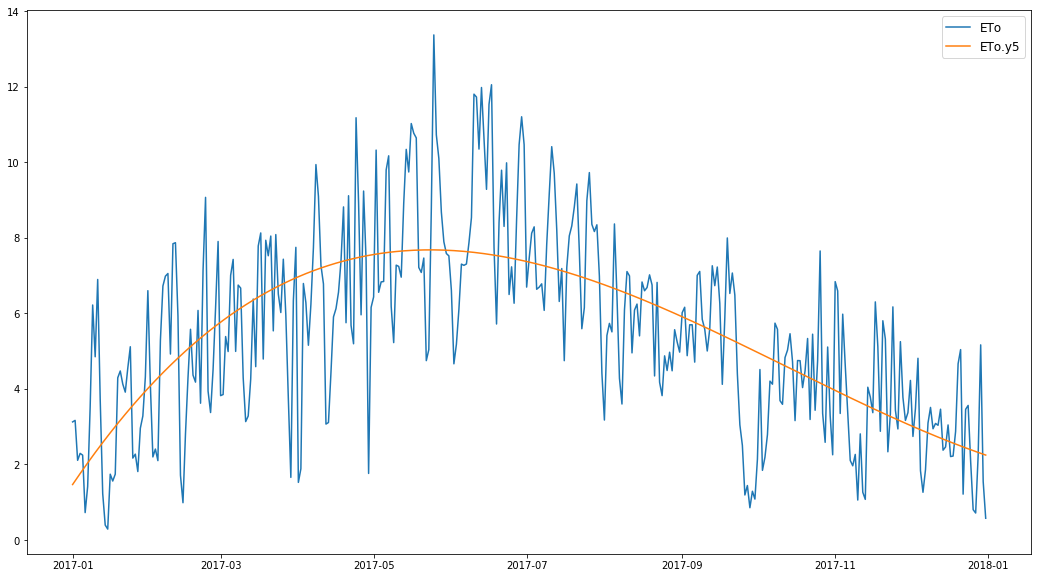

In [85]:
d = {"ETo":DF["ETo"],"ETo.y5":y5}

data = pd.DataFrame(data=d) 
cols_data = list(data)
plt.figure(figsize=(18,10))

for i in cols_data:
    plt.plot(data[i])
    
plt.legend(prop={'size':12})

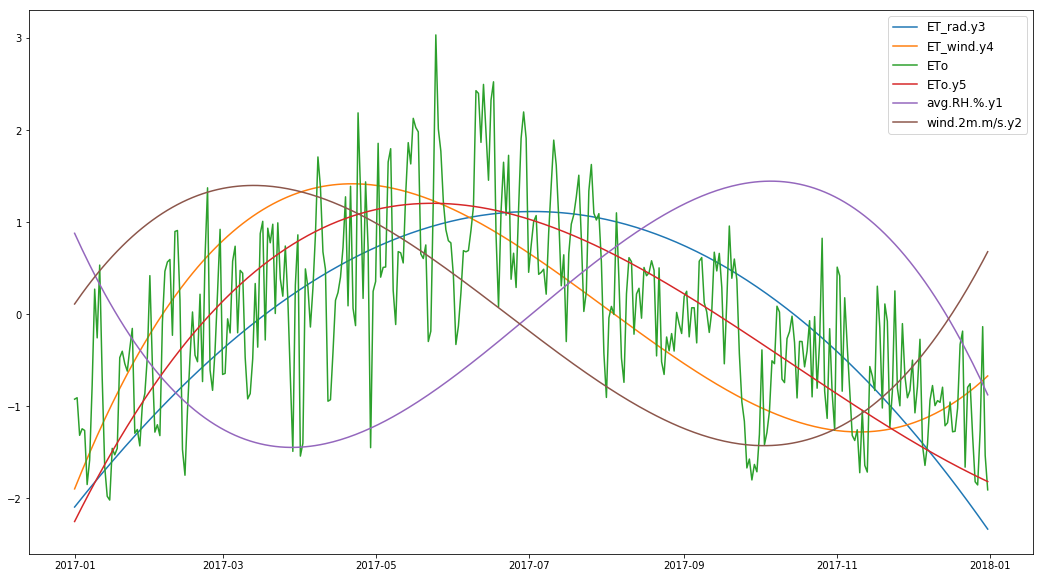

In [83]:
cols_regressed_data_scaled = list(regressed_data_scaled)
plt.figure(figsize=(18,10))

for i in cols_regressed_data_scaled:
    plt.plot(regressed_data_scaled[i])
    
plt.legend(prop={'size':12})

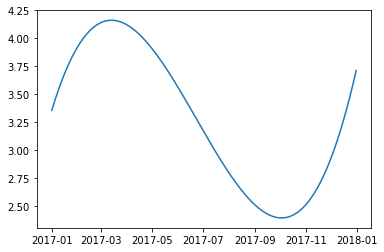

In [76]:
plt.plot(regressed_data["wind.2m.m/s.y2"])

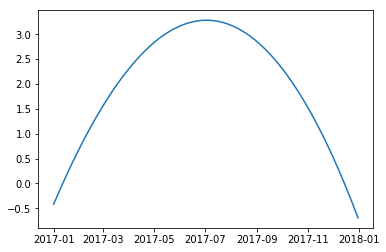

In [77]:
plt.plot(regressed_data["ET_rad.y3"])

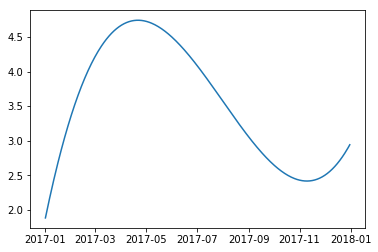

In [78]:
plt.plot(regressed_data["ET_wind.y4"])

In [ ]:
plt.plot(regressed_data)

In [ ]:
cols_regressed_data_scaled = list(regressed_data_scaled)
plt.figure(figsize=(18,10))

for i in cols_regressed_data_scaled:
    plt.plot(regressed_data_scaled[i])
    
plt.legend(prop={'size':12})

In [ ]:
DF = pd.read_csv("https://drive.google.com/uc?id=1YiLueOw-vbVKIf2kvb9RRKY_hpsCj1zD")
#DF = pd.read_csv("Z:\met_2017_daily_TESTER.csv")

""" calculate daily mean temperature """

DF["avgt.C"] = (DF["mint.C"] + DF["maxt.C"]) / 2

""" convert daily solar from watts to megajoules """

DF["radn.MJ/m2"] = DF["radn.W/m2"] * 0.0864

""" Slope of the saturation vapor pressure curve. Using np.exp because we have vectorized data - base won't work """

DF["delta"] = 4098 * (0.6106 * np.exp((17.27 * DF["avgt.C"])/(DF["avgt.C"] + 237.3))) / ((DF["avgt.C"] + 237.3)**2)

""" Atmospheric pressure (P) calculation with the only input being elevation above sea level in meters. """

elevation = 992

P = 101.3 * (((293 - (0.0065 * elevation)) / 293) ** 5.26)

""" Psychrometric constant. This is the ratio of specific heat of moist air at constant pressure. """

gamma = 0.000665 * P

""" Delta Term (DT) is an auxilialy calculation for the radiation term. """

DF["delta.term"] = DF["delta"] / (DF["delta"] + (gamma * (1 + 0.34 * DF["wind.2m.m/s"])))

""" Psi Term (PT) is an auxiliary calculation for Wind Term """

DF["psi.term"] = gamma / (DF["delta"] + (gamma * (1 + 0.34 * DF["wind.2m.m/s"])))

""" Temperature Term (TT) is an auxiliary calculation for Wind Term """

DF["temp.term"] = (900 / (DF["avgt.C"] + 237)) * DF["wind.2m.m/s"]

""" Mean saturation vapor pressure derived from max and min temp values, kPa """

DF["max.sat.vap"] = 0.6108 * np.exp((17.27 * DF["maxt.C"]) / (DF["maxt.C"] + 237.3))

DF["min.sat.vap"] = 0.6108 * np.exp((17.27 * DF["mint.C"]) / (DF["mint.C"] + 237.3))

DF["mean.sat.vap"] = (DF["min.sat.vap"] + DF["max.sat.vap"]) / 2

""" The actual vapor pressure (ea) derived from relative humidity. """

DF["actual.vap"] = ((DF["min.sat.vap"] * (DF["max.RH.%"] / 100)) + (DF["max.sat.vap"] * (DF["min.RH.%"] / 100))) / 2

""" The inverse relative distance Earth-Sun (earth.sun.rel.dis) and solar declination (solar.decl) """

DF["earth.sun.rel.dis"] = 1 + (0.033 * np.cos(((2 * math.pi)/365) * DF["day"]))

DF["solar.decl"] = 0.409 * np.sin((((2 * math.pi)/365) * DF["day"]) - 1.39)

""" Conversion of latitude (lat_in_rad) in degrees to radians """

lat_in_rad = (math.pi / 180) * (33.5947684)

""" Sunset hour angle (sunset_angle) """

DF["sunset_angle"] = np.arccos(-math.tan(lat_in_rad) * np.tan(DF["solar.decl"]))

"""" Extraterrestrial radiation (extraT_rad) """

aa = DF["sunset_angle"]*np.sin(lat_in_rad)*np.sin(DF["solar.decl"])

bb = np.cos(lat_in_rad)*np.cos(DF["solar.decl"])*np.sin(DF["sunset_angle"])

DF["extraT_rad"] = (((24*60)/math.pi)*0.0820*DF["earth.sun.rel.dis"])*(aa + bb)

""" Clear sky radiation (clr_sky_rad) """

DF["clr_sky_rad"] = (0.75 + (2e-5)*elevation) * DF["extraT_rad"]

""" Net solar or net shortwave radiation. """

albedo = 0.23

DF["net.rad.MJ/m2*day"] = (1 - 0.23) * DF["radn.MJ/m2"]

""" Net outgoing long wave solar radiation """

sb_const = 4.903e-9

DF["outLW_rad"] = sb_const * (((DF["maxt.C"]+273.16)**4 + (DF["mint.C"]+273.16)**4)/2)*(0.34-(0.14*np.sqrt(DF["actual.vap"])))*(1.35*(DF["radn.MJ/m2"]/DF["clr_sky_rad"]) - 0.35)

""" Net radiation (total.net.rad) """

DF["total.net.rad"] = DF["net.rad.MJ/m2*day"] - DF["outLW_rad"]

DF["total.net.rad.mm"] = DF["total.net.rad"] * 0.408

""" Radiation term (ET_rad) """

DF["ET_rad"] = DF["delta.term"] * DF["total.net.rad.mm"]

""" Wind term (ET_wind) """

DF["ET_wind"] = DF["psi.term"]*DF["temp.term"]*(DF["mean.sat.vap"] - DF["actual.vap"])

""" Final ET calculation """

DF["ETo"] = DF["ET_rad"] + DF["ET_wind"]

""" set data frame index as date """

DF["ETo"]


In [ ]:
qgrid_widget = qgrid.QgridWidget(df=DF[["ETo","ET_wind","ET_rad","total.net.rad","total.net.rad.mm",
                                        "radn.MJ/m2","avgt.C","wind.2m.m/s"]], show_toolbar=False)
#qgrid_widget.layout = ipyw.Layout(width='40%')
qgrid_widget

In [ ]:
qgrid_widget = qgrid.QgridWidget(df=DF[["total.net.rad"]], show_toolbar=True)
qgrid_widget.layout = ipyw.Layout(width='20%')
qgrid_widget

In [ ]:
weekly_data = DF.resample('W').mean()

In [ ]:
list(DF)

In [ ]:
x = DF["day"]
y = DF["ETo"]

z = np.polyfit(x, y, 3)
f = np.poly1d(z) # fit_fn is now a function which takes in x and returns an estimate for y
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.figure(figsize=(18,6.5))
plt.plot(x,y,'-', x_new, y_new)
plt.ylabel("ETo")
print(f)

## FAO-56 Link below: ##

http://www.fao.org/docrep/X0490E/x0490e08.htm#chapter%204%20%20%20determination%20of%20eto

## University of Florida Paper below: ##

In [ ]:
from IPython.display import IFrame
IFrame("https://drive.google.com/uc?id=1EVjUARYY0g5o0ioVy70yANynh8DAQ4ir", width=1000, height=500) # variable 

#### This is a way to output python code to the html side ####

In [ ]:
def bar():
    from IPython.display import display, HTML
    chart = HTML('<h1>Hello, world!</h1>')
    # or chart = charts.plot(...)
    display(chart)

bar()